# Write a script that implement the GD algorithm, with the following structure:
Input:
    f: the function f(x) we want to optimize.
    It is supposed to be a Python function, not an array.
    grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.
    x0: an n-dimensional array which represents the initial iterate.
    kmax: an integer. The maximum possible number of iterations (to avoid infinite loops)
    tolf: small float. The relative tollerance of the algorithm.
    Convergence happens if ||grad_f(x_k)||_2 < tolf ||grad_f(x_0)||_2
    tolx: small float. The tollerance in the input domain.
    Convergence happens if ||x_{k} - x_{k-1}||_2 < tolx.
    Pay attention to the first iterate.
    Output:
    x: an array that contains the value of x_k FOR EACH iterate x_k (not only the latter).
    k: an integer. The number of iteration needed to converge. k < kmax.
    f_val: an array that contains the value of f(x_k) FOR EACH iterate x_k.
    grads: an array that contains the value of grad_f(x_k) FOR EACH iterate x_k.
    err: an array the contains the value of ||grad_f(x_k)||_2 FOR EACH iterate x_k.

In [3]:
import matplotlib.pyplot as plt
import numpy
import numpy as np

In [4]:
def plot(x, errf, x_true=False, back=False, alpha=0.2):
    k = len(x)
    title = f"{'x*=x_true, ' if x_true else ''} x_c={np.round(x[-1], 2)} N. of iteration: {k}, backtracking: {'yes' if back else 'no'} {'alpha: ' + str(alpha) if not back else ''}"
    plt.title(title)
    plt.plot(errf)
    if x_true:
        x_errors = np.zeros(x.shape)
        for i, x_k in enumerate(x):
            x_errors[i] = np.linalg.norm(x_k - x_true)
        plt.plot(x_errors)
    #plt.subplot(2, 2, 2)
    #plt.plot(points, grads)
    #plt.subplot(2, 2, 3)
    #plt.plot(points, err)

    plt.show()





def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha



def GD(f, grad_f, x0, tolf, tolx, kmax, alpha=0.2, back=False):

    x0 = np.array(x0)
    shape = (kmax, *x0.shape)
    # output
    x = np.zeros(shape)
    f_val = np.zeros(shape)
    grads = np.zeros(shape)
    err = np.zeros(shape)

    x_tol = tolx
    f_tol = tolf
    x_old = x0
    k = 0

    while k < kmax and x_tol >= tolx and f_tol >= tolf:
        if back:
            alpha = backtracking(f, grad_f, x_old)
        x_k = x_old - alpha * np.array(grad_f(x_old))
        x_tol = np.linalg.norm(x_k-x_old)
        f_tol = np.linalg.norm(f(x_k))

        # Update arrays
        x[k] = x_k
        f_val[k] = f(x_k)
        grads[k] = grad_f(x_k)
        err[k] = np.linalg.norm(grads[k])
        x_old = x_k
        k = k+1

    return x[:k], f_val[:k], grads[:k], err[:k]



## Test the algorithm above on the following functions:

In [5]:
tolf = 1e-4
tolx = 1e-4
kmax = 100
alphas = [0.1, 0.01]

### Function 1
 $$f(x_1, x_2) = (x_1-3)^2 + (x_2-1)^2$$
for which the true optimum is $x^* = (3,1)^T$

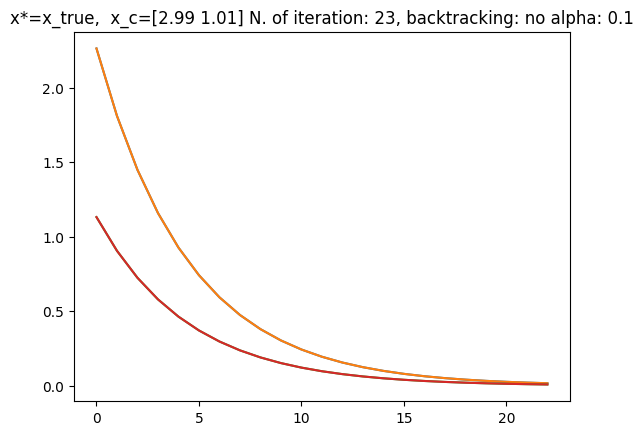

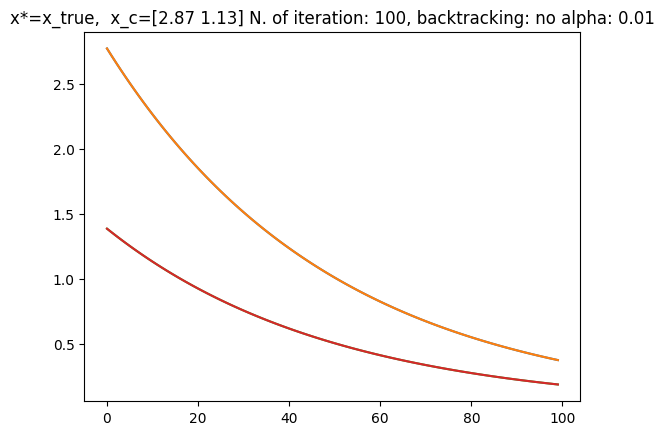

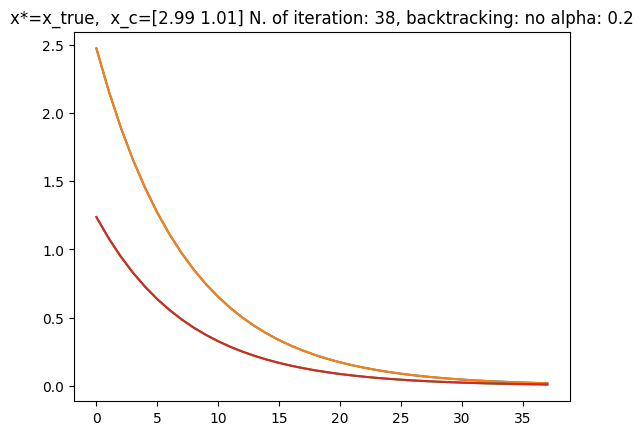

In [6]:
def f1(x):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2
def grad_f1(x):
    x1, x2 = x
    return np.array((2*(x1-3), 2*(x2-1)))


x0 = (2, 2)
x_true1 = (3,1)

def test_function(f, grad_f, x0, kmax, x_true=False):
    for alpha in alphas:
        x, f_val, grads, err = GD(f, grad_f, x0, tolf, tolx, kmax, alpha)
        plot(x, err, x_true, alpha=alpha)
    x, f_val, grads, err = GD(f, grad_f, x0, tolf, tolx, kmax, back=True)
    plot(x, err, x_true)

test_function(f1, grad_f1, x0, kmax, x_true1)

## Function 2
$$f(x_1, x_2) = 10 (x_1-1)^2 + (x_2 - 2)^2$$

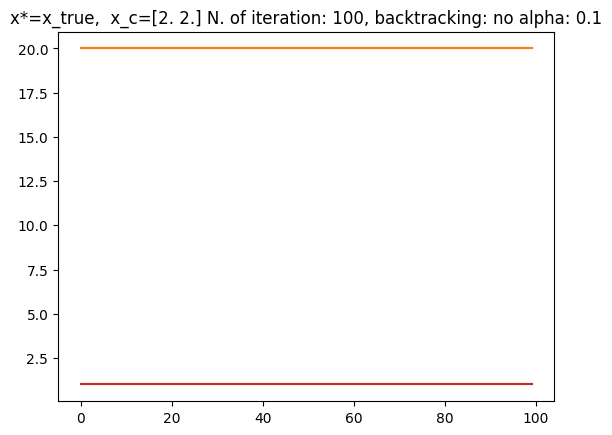

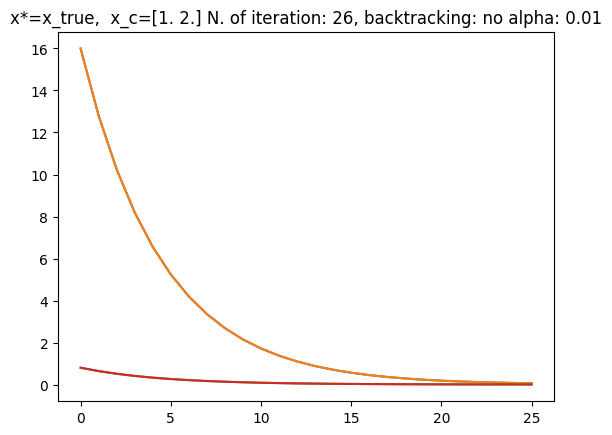

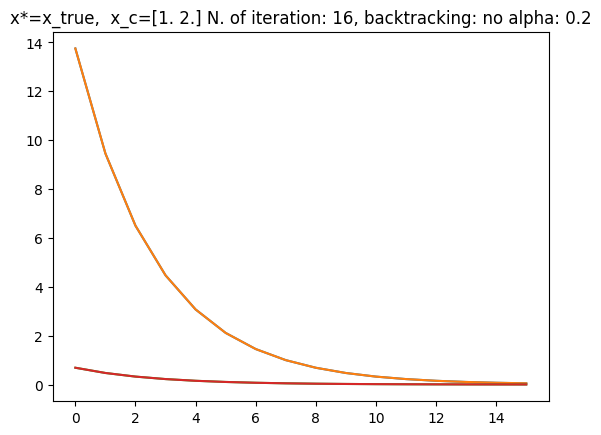

In [7]:
def f2(x):
    x1, x2 = x
    return 10*(x1 - 1)**2 + (x2 - 2)**2
def grad_f2(x):
    x1, x2 = x
    return np.array((20*(x1-1), 2*(x2-2)))


x0 = (2, 2)
x_true2 = (1,2)

test_function(f2, grad_f2, x0, kmax, x_true2)

## Function 3
$$f(x) = \frac{1}{2}||Ax-b||^2_2 $$

N =  5


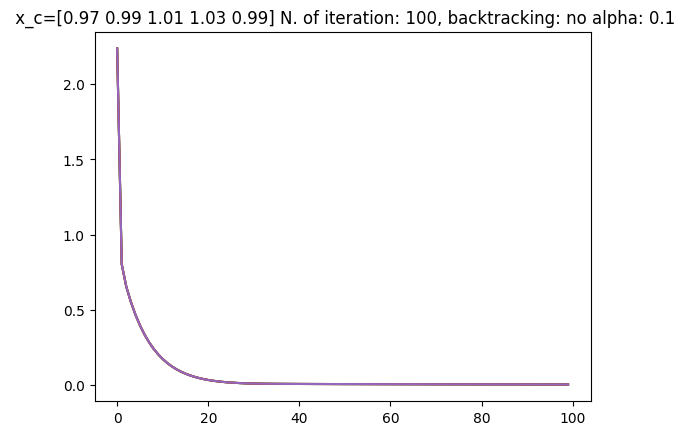

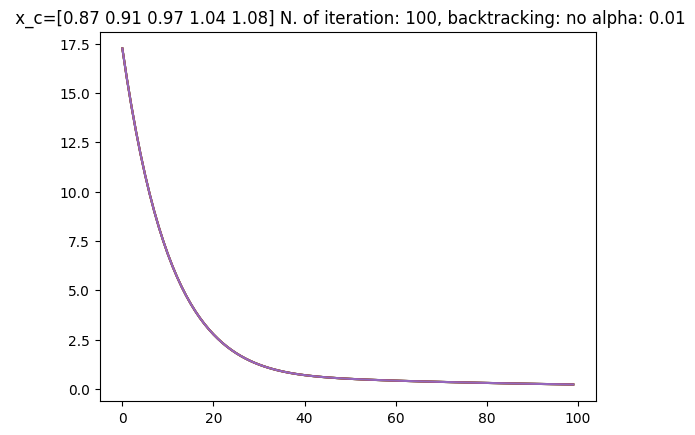

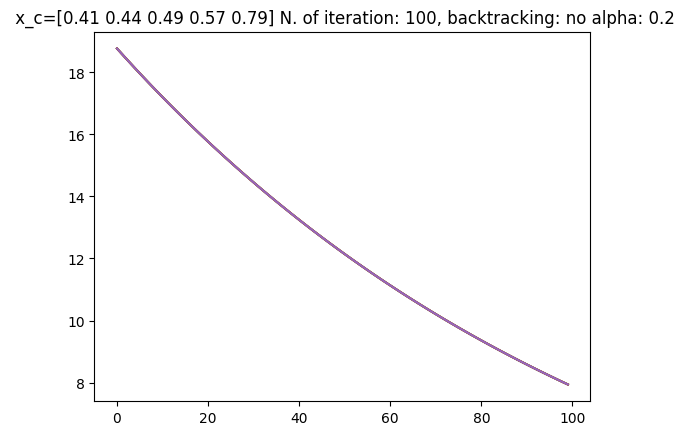

N =  10


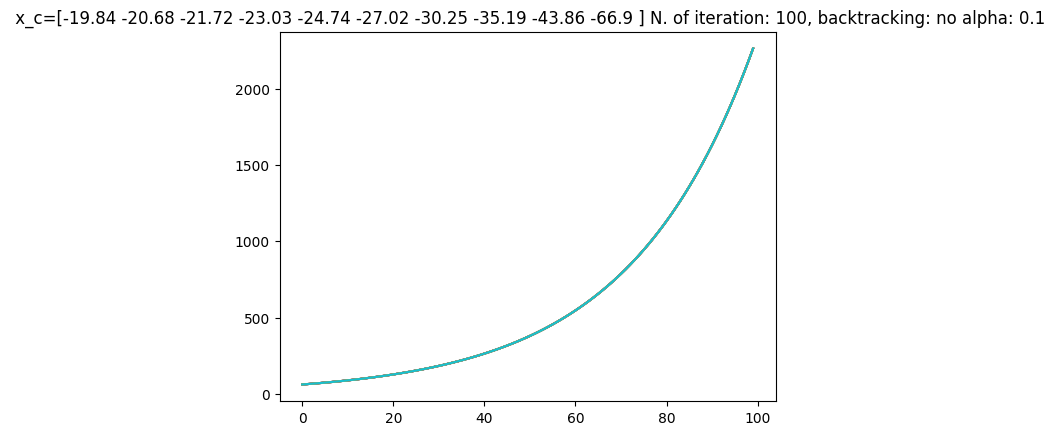

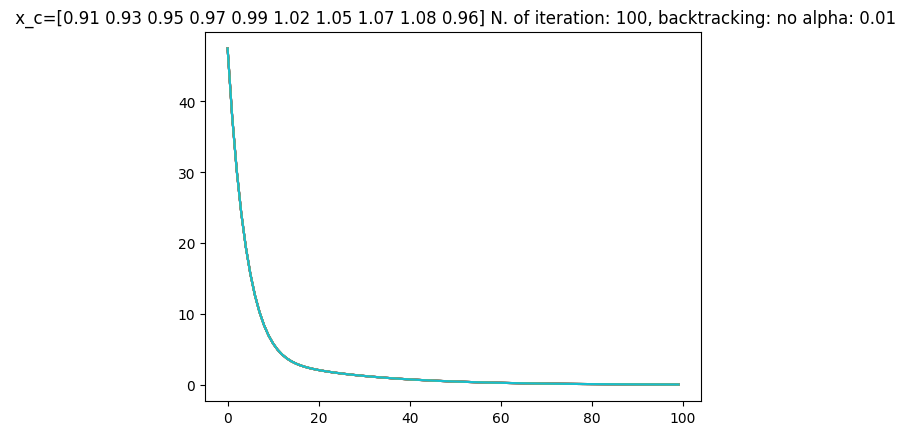

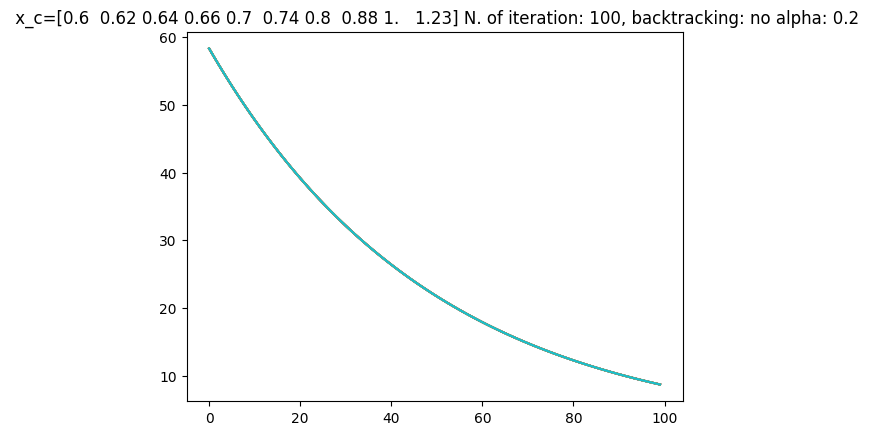

N =  15


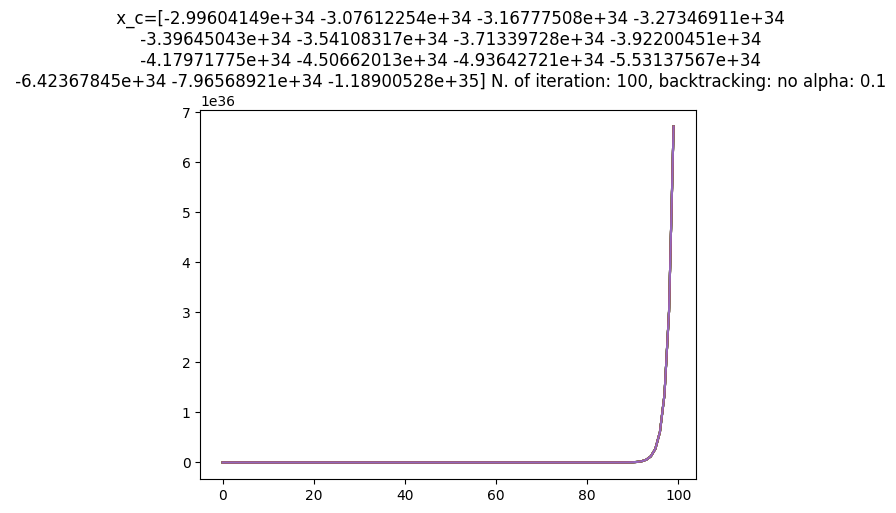

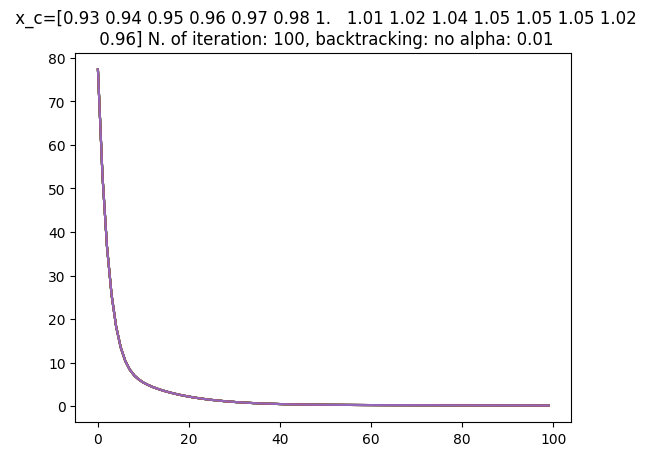

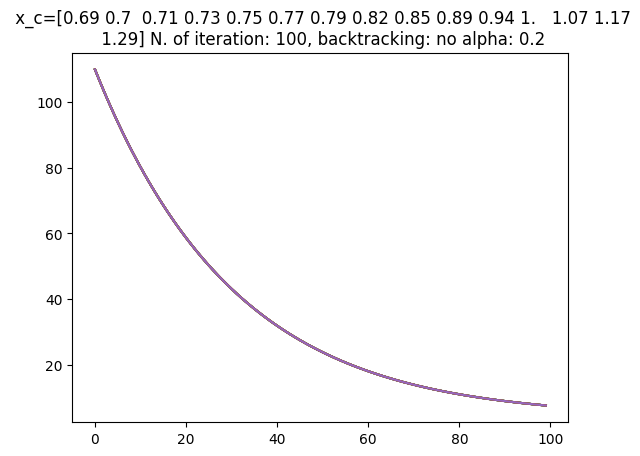

In [8]:
def f3(x):
    x = np.array(x)
    x = np.reshape(x,(1, len(x)))
    n, m = x.shape
    x_true = np.ones((1, n))
    v = np.linspace(0, 1, n, endpoint=True)
    A = numpy.vander(v)
    b = A @ x_true
    return 1/2 * np.linalg.norm(A @ x - b, 2)**2

def grad_f3(x):
    n = len(x)
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones(n).T
    b = A @ x_true
    return np.array(A.T@(A@x-b))


N = np.arange(5, 20, 5)

for n in N:
    x0 = [0 for i in range(n)]
    print("N = ", n)
    test_function(f3, grad_f3, x0, kmax)

## Function 4
$$f(x) = \frac{1}{2}||Ax-b||^2_2 + \frac{\lambda}{2}||x||^2_2 $$

Lambda:  0.0


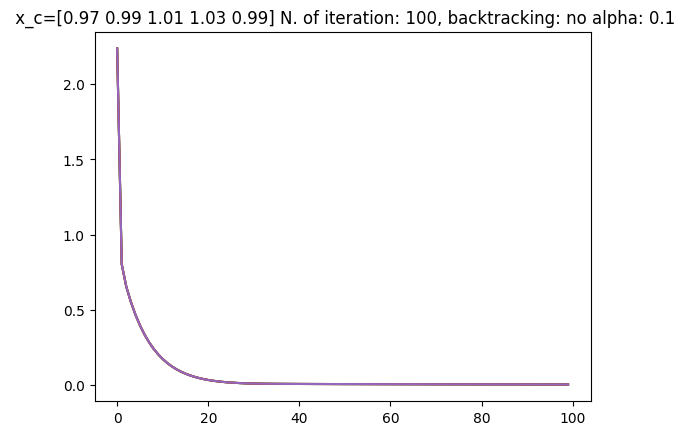

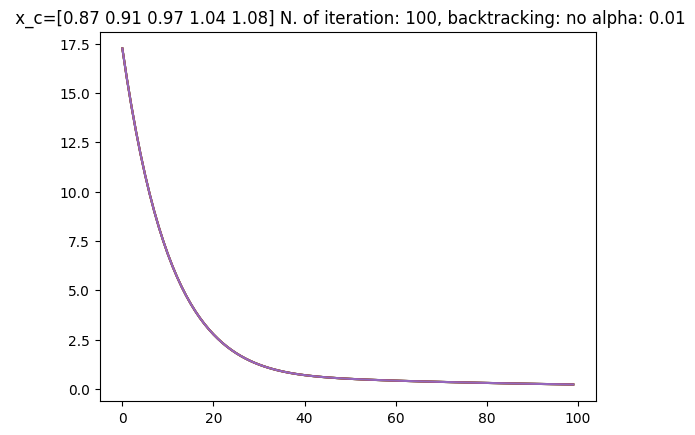

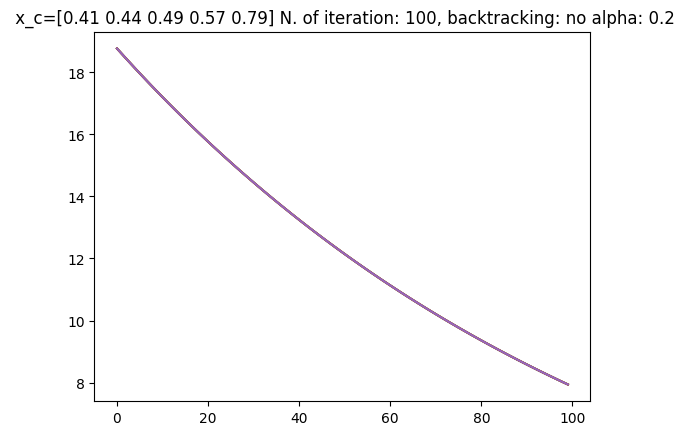

Lambda:  0.5


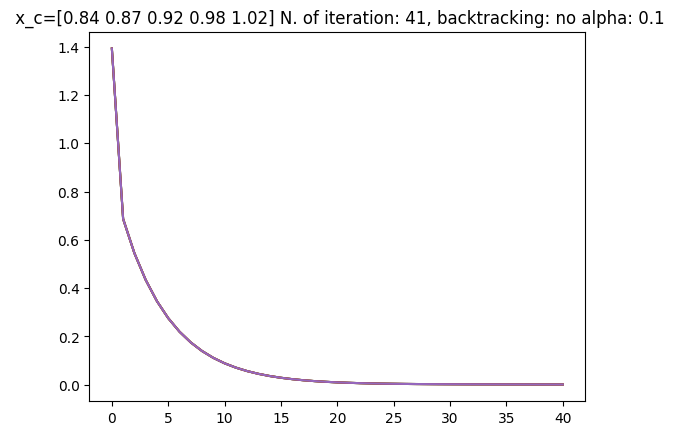

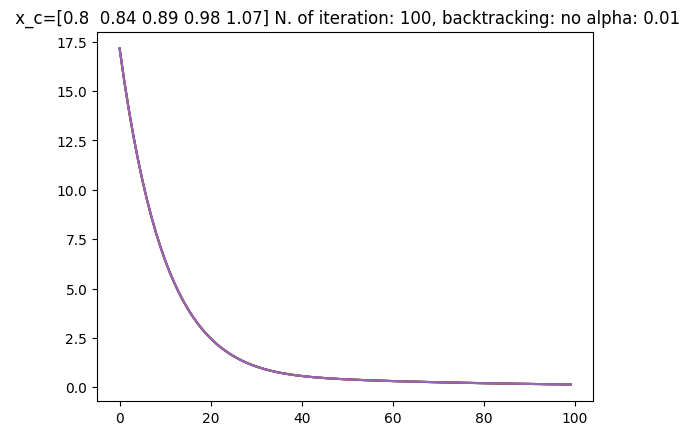

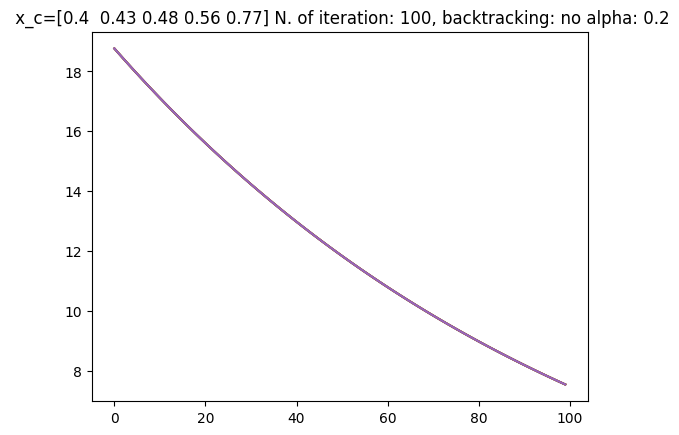

Lambda:  1.0


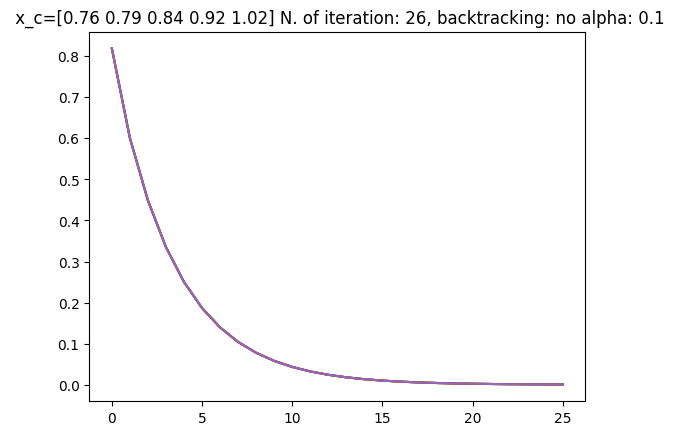

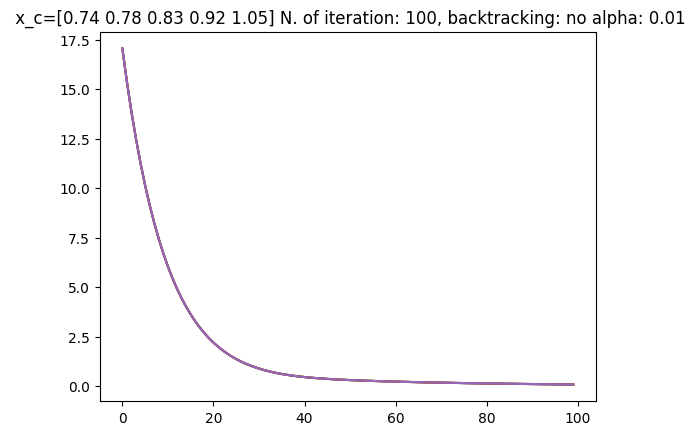

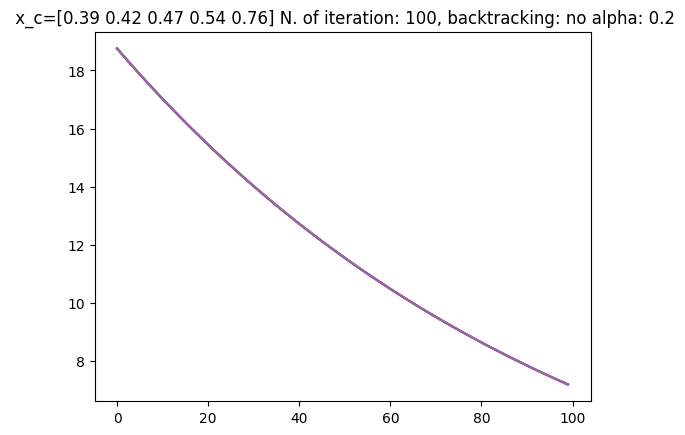

In [9]:
def f4_builder(lmb):
    def f4(x):
        x = np.array(x)
        x = np.reshape(x, (1, len(x)))
        n, m = x.shape
        x_true = np.ones((1, n))
        v = np.linspace(0, 1, n, endpoint=True)
        A = numpy.vander(v)
        b = A @ x_true
        return 1/2 * np.linalg.norm(A @ x - b, 2)**2 + lmb/2 * np.linalg.norm(x)**2
    return f4

def grad_f4_builder(lmb):
    def grad_f4(x):
        n = len(x)
        v = np.linspace(0,1,n)
        A = np.vander(v)
        x_true = np.ones(n).T
        b = A @ x_true
        return np.array(A.T@(A@x-b)) + lmb*x
    return grad_f4


n = 5
lmbs = np.linspace(0, 1, 3)
x0 = [0 for i in range(n)]


for lmb in lmbs:
    print("Lambda: ", lmb)
    f4 = f4_builder(lmb)
    grad_f4 = grad_f4_builder(lmb)
    test_function(f4, grad_f4, x0, kmax)

### Function 5
$$ f(x)= x^4 + x^3 -2x^2 - 2x $$

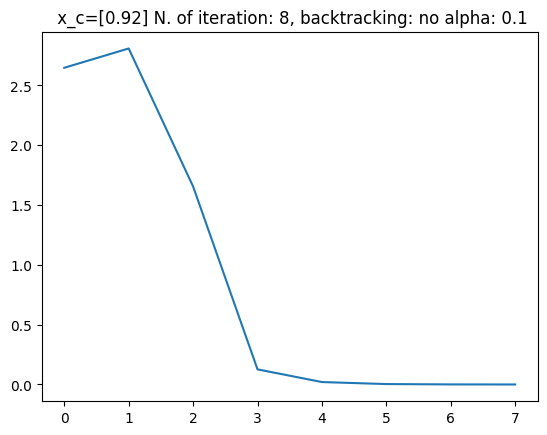

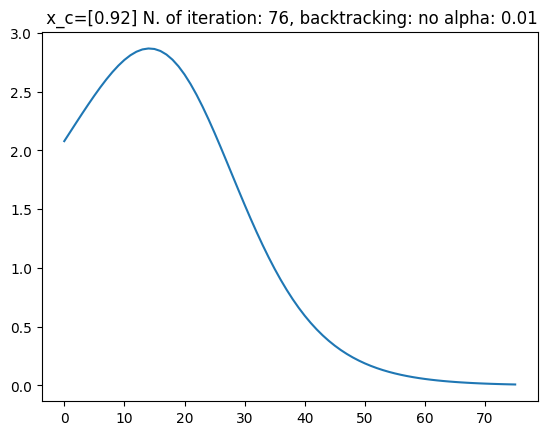

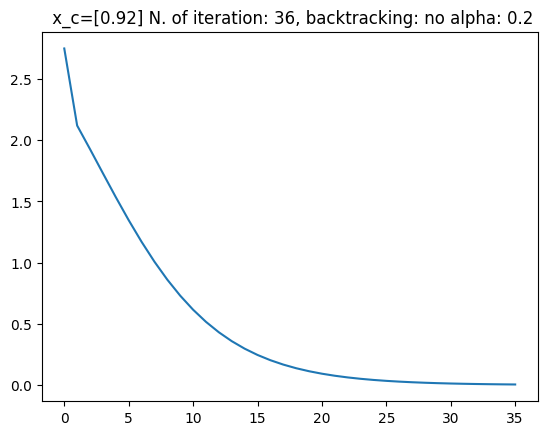

In [10]:
def f5(x):
    return np.power(x,4) + np.power(x, 3) - 2*np.power(x,2) - 2*x

def grad_f5(x):
    return np.array(4*np.power(x, 3) + 3*np.power(x,2) - 4*x - 2)


N = np.arange(5, 20, 5)

x0 = [0.]
test_function(f5, grad_f5, x0, kmax)

Only for the non-convex function defined in 5, plot it in the interval [−3, 3] and test the convergence point of GD with different values of x0 and different step-sizes. Observe when the convergence point is the global minimum and when it stops on a local minimum or maximum.

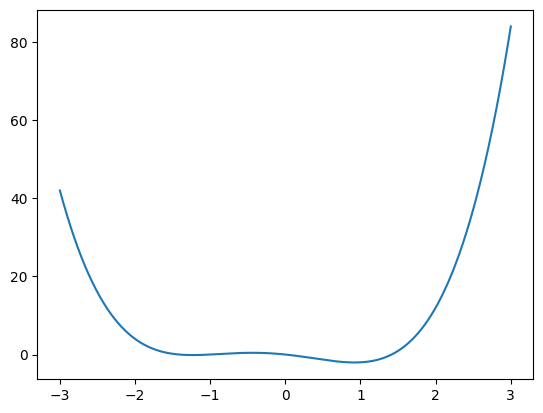

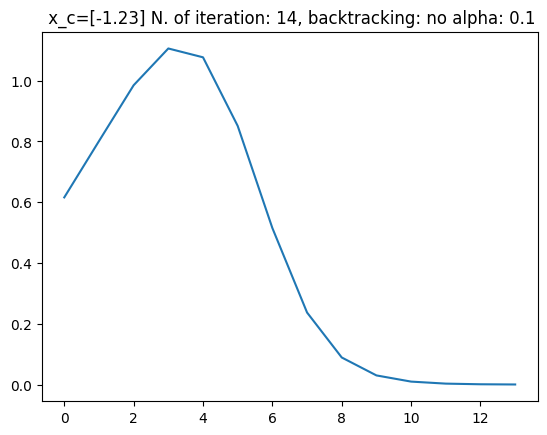

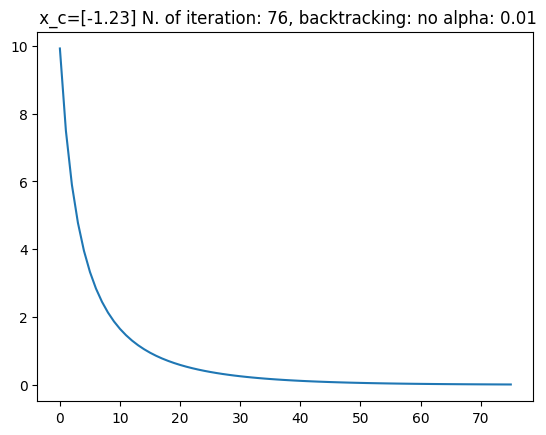

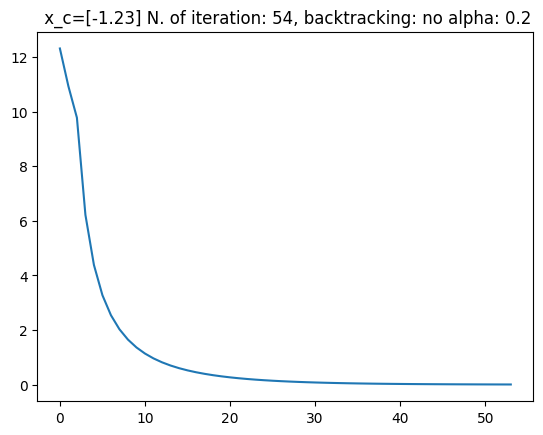

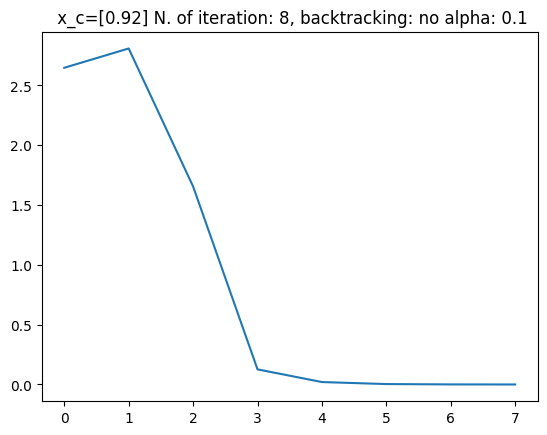

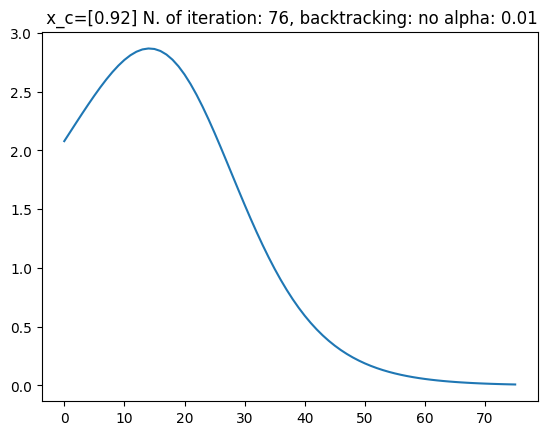

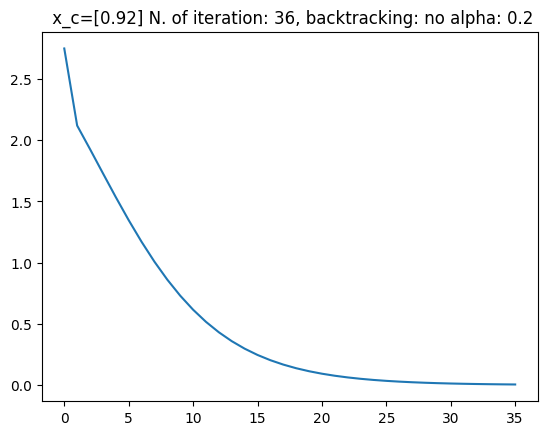

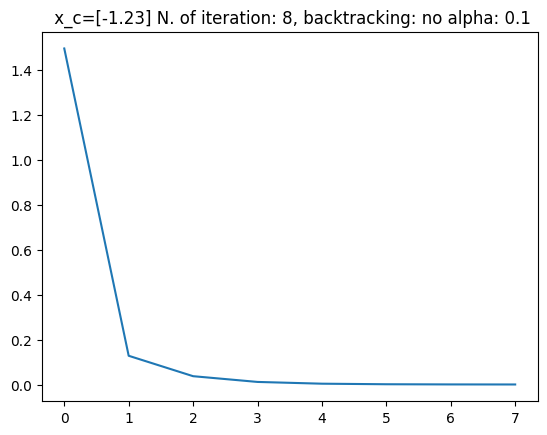

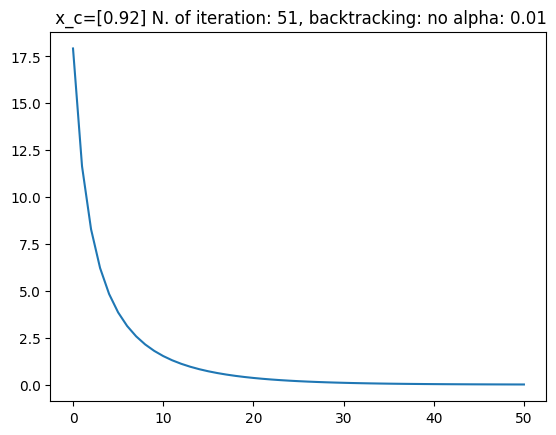

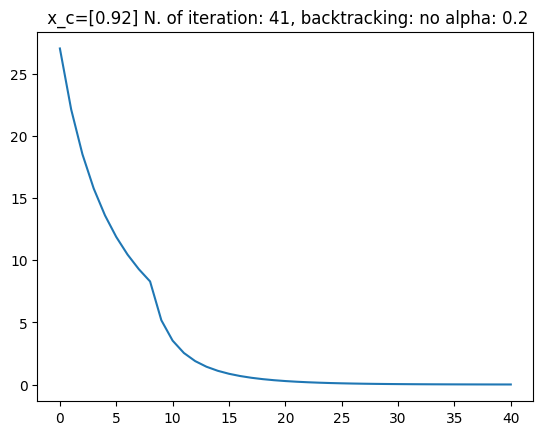

In [11]:
x_5 = np.linspace(-3, 3, 1000)
plt.plot(x_5, f5(x_5))
plt.show()

starting_points = [-2, 0, 2]

for x0 in starting_points:
    x0 = np.array([x0])
    test_function(f5, grad_f5, x0, kmax)


Hard (optional): For the functions 1 and 2, plot the contour around the minimum and the path defined
by the iterations (following the example seen during the lesson). See plt.contour to do that.

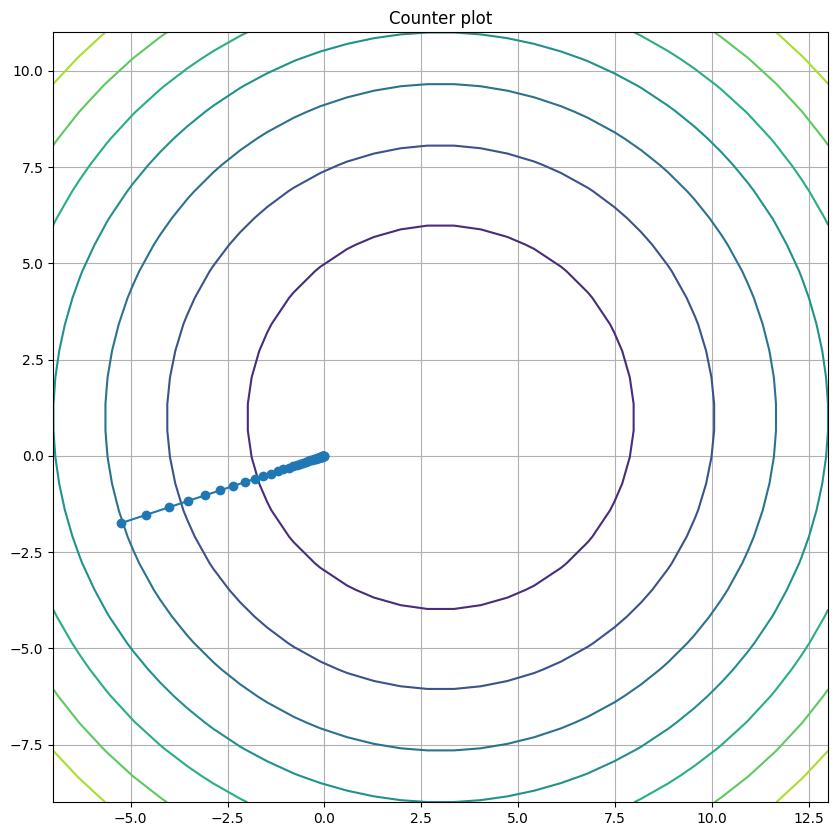

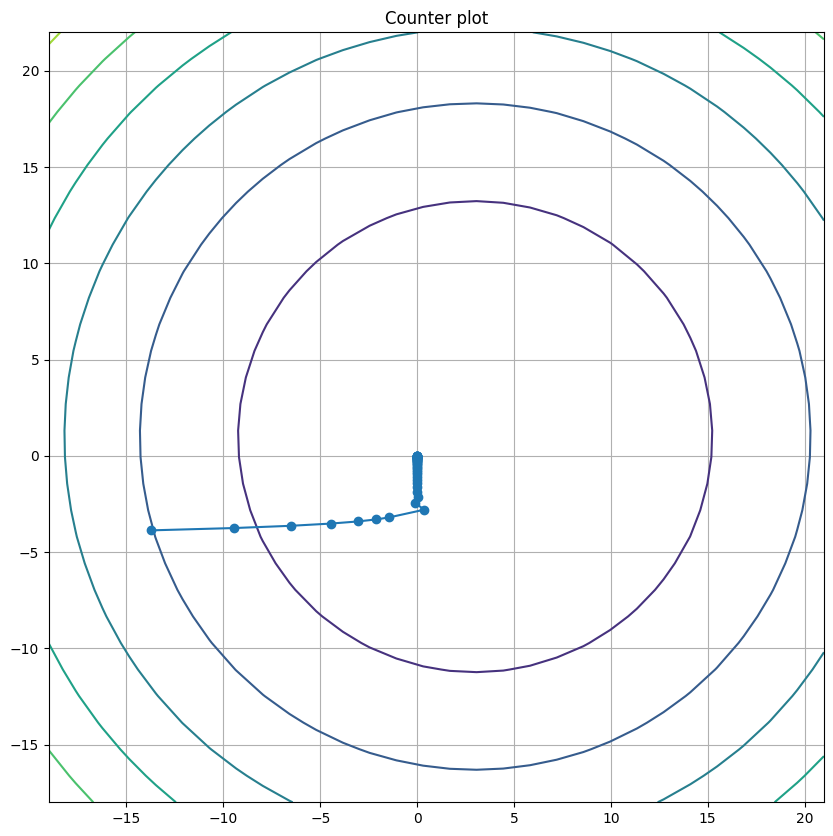

In [12]:
def contour(f, grad_f, x0, x_true, radius, tolx, tolf, kmax):
    x11, x12 = x_true

    xv = np.linspace(x11 - radius, x11 + radius, 30)
    yv = np.linspace(x12 - radius, x12 + radius, 30)
    xx, yy = np.meshgrid(xv, yv)

    x, f_val, grads, err = GD(f, grad_f, x0, tolf, tolx, kmax, back=True)
    zz = f1((xx, yy))

    plt.figure(figsize=(10,10))
    plt.contour(xx, yy, zz)
    plt.plot(grads[:, 0], grads[:, 1], 'o-')
    plt.title("Counter plot")
    plt.grid()
    plt.show()


contour(f1, grad_f1, (0, 0), x_true1, 10, tolx, tolf, kmax)
contour(f2, grad_f2, (0, 0), x_true2, 20, tolx, tolf, kmax)

# Optimization via Stochastic Gradient DescentInput:
l: the function l(w; D) we want to optimize.
It is supposed to be a Python function, not an array.
grad_l: the gradient of l(w; D). It is supposed to be a Python function, not an array.
w0: an n-dimensional array which represents the initial iterate. By default, it
should be randomly sampled.
data: a tuple (x, y) that contains the two arrays x and y, where x is the input data,
y is the output data.
batch_size: an integer. The dimension of each batch. Should be a divisor of the number of data.
n_epochs: an integer. The number of epochs you want to reapeat the iterations.
Output:
w: an array that contains the value of w_k FOR EACH iterate w_k (not only the latter).
f_val: an array that contains the value of l(w_k; D)
FOR EACH iterate w_k ONLY after each epoch.
grads: an array that contains the value of grad_l(w_k; D)
FOR EACH iterate w_k ONLY after each epoch.
err: an array the contains the value of ||grad_l(w_k; D)||_2
FOR EACH iterate w_k ONLY after each epoch.

In [13]:
# Import the data MNIST

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

data = pd.read_csv("data.csv")
data = np.array(data)

def split(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Xtest, Ytrain, Ytest)

y = data[:, 0].T
x = data[:, 1:].T

digits = [0, 6]

I1 = (y==0)
I2 = (y==6)
X1 = x[:, I1]
X2 = x[:, I2]
Y1 = y[I1]
Y2 = y[I2]

X = np.concatenate((X1, X2), axis=1)
Y = np.concatenate((Y1, Y2))

d, N = X.shape

Ntrain = 300

x_train, x_test, y_train, y_test = split(X, Y, Ntrain)
print(x_train.shape, x_test.shape)


(784, 300) (784, 7969)


In [162]:
batch_size = 30

def batch(x, y, batch_size):
    n = x.shape[1]
    idx = np.arange(n)
    np.random.shuffle(idx)
    n_batches = n // batch_size
    for i in range(n_batches):
        batch_index = idx[i:i+1*batch_size]
        yield x[:, batch_index], y[batch_index]


def SGD(l, grad_l, w0, data, batch_size, n_epochs=5):

    shape = (n_epochs, *w0.shape)
    x, y = data
    d = x.shape[0]
    w = np.zeros(shape)
    f_val = np.zeros((n_epochs, batch_size, 1))
    grads = np.zeros((n_epochs, batch_size, d+1))
    err = np.zeros(n_epochs)

    alpha = 0.001
    w_old = w0
    w[0] = w0
    w_k = w_old

    for epoch in range(n_epochs):
        batch_iterator = batch(x, y, batch_size)
        sum_grad = np.zeros(w0.shape)
        for x, y in batch_iterator:
            for x_i, y_i in zip(x.T, y):
                x_i = x_i.reshape((1, len(x_i)))
                grad = grad_l(w_old, x_i, y_i)
                sum_grad += grad.T
            w_k  = w_old - alpha * sum_grad
            w_old = w_k
        w[epoch] = w_k
        f_val[epoch] = l(w_k, x.T, y)
        # print(grad_l(w_k, x.T, y).shape)
        grads[epoch] = grad_l(w_k, x.T, y)
        err[epoch] = np.linalg.norm(grads[epoch])
    return w, f_val, grads, err


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def f(x, w):
    d, n = x.shape
    x_cup = np.insert(x, 0, 1, axis=1)
    x_cup = x_cup.reshape((n+1, d))
    return  sigmoid(x_cup.T @ w)

def grad_f(x):
    return np.exp(-x) / (np.exp(-x) + 1) ** 2

def l(w, x, y):
    y = y.reshape((len(y), 1))
    return np.abs(f(x, w)-y)**2

def grad_l(w, x, y):
    d, n = x.shape
    x_cup = np.insert(x, 0, 1, axis=1)
    x_cup = x_cup.reshape((n+1, d))
    y = np.array(y)
    y = y.reshape((d,1))
    return sigmoid(x_cup.T @ w)*(1-sigmoid(x_cup.T @ w)) * x_cup.T * (f(x, w) - y)

data = (x_train, y_train)
w0 = np.random.random((d+1, 1))
w, f_val, grads, err = SGD(l, grad_l, w0, data, batch_size, 5)
print(w[-1])

[[0.25688352]
 [0.79665312]
 [0.88111785]
 [0.81499297]
 [0.9938429 ]
 [0.26389899]
 [0.65786099]
 [0.96818032]
 [0.38334977]
 [0.57520421]
 [0.80906027]
 [0.0881095 ]
 [0.44642654]
 [0.58986504]
 [0.17994966]
 [0.64509844]
 [0.55443559]
 [0.72415844]
 [0.20188456]
 [0.37326064]
 [0.11046561]
 [0.03574802]
 [0.0436589 ]
 [0.22012319]
 [0.42958919]
 [0.43319825]
 [0.35936278]
 [0.16746616]
 [0.29257722]
 [0.68197169]
 [0.90897016]
 [0.62539486]
 [0.47500373]
 [0.83498472]
 [0.1218445 ]
 [0.02917425]
 [0.29112398]
 [0.67904968]
 [0.09980014]
 [0.02848302]
 [0.90743634]
 [0.64874102]
 [0.67322863]
 [0.95675855]
 [0.09074583]
 [0.77108295]
 [0.45513586]
 [0.09335439]
 [0.54081757]
 [0.59018142]
 [0.59279847]
 [0.8311315 ]
 [0.93468108]
 [0.35775929]
 [0.47602592]
 [0.06480628]
 [0.40413895]
 [0.88016435]
 [0.69732973]
 [0.43204601]
 [0.78335329]
 [0.86746553]
 [0.09463145]
 [0.51572024]
 [0.3211811 ]
 [0.03160036]
 [0.1098713 ]
 [0.69633565]
 [0.53526222]
 [0.18956263]
 [0.11122824]
 [0.32